# Wine Quality Prediction

In [39]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Loading csv dataset

In [5]:
data=pd.read_csv('winequality-red.csv')
data.head(10)#top ten reports

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


 In above dataset we have fixed acidity	,volatile acidity,	citric acid,	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality
    this are feature our data set with help of this data set we predict the qualiuty of wine.

# classes of target value-quality

In [4]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

# Discription of the given dataset.

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Above data set we have mean, std, min, Max, percentile.

As per my observation:

There is a big gap between 75% and max values of residual sugar column
There is a big gap between 75% and max values of free sulfur dioxide column
There is a huge gap between 75% and max value of total sulfur dioxide column
All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.


# To check the missing value

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# correalation matrix among all feature inside the data set

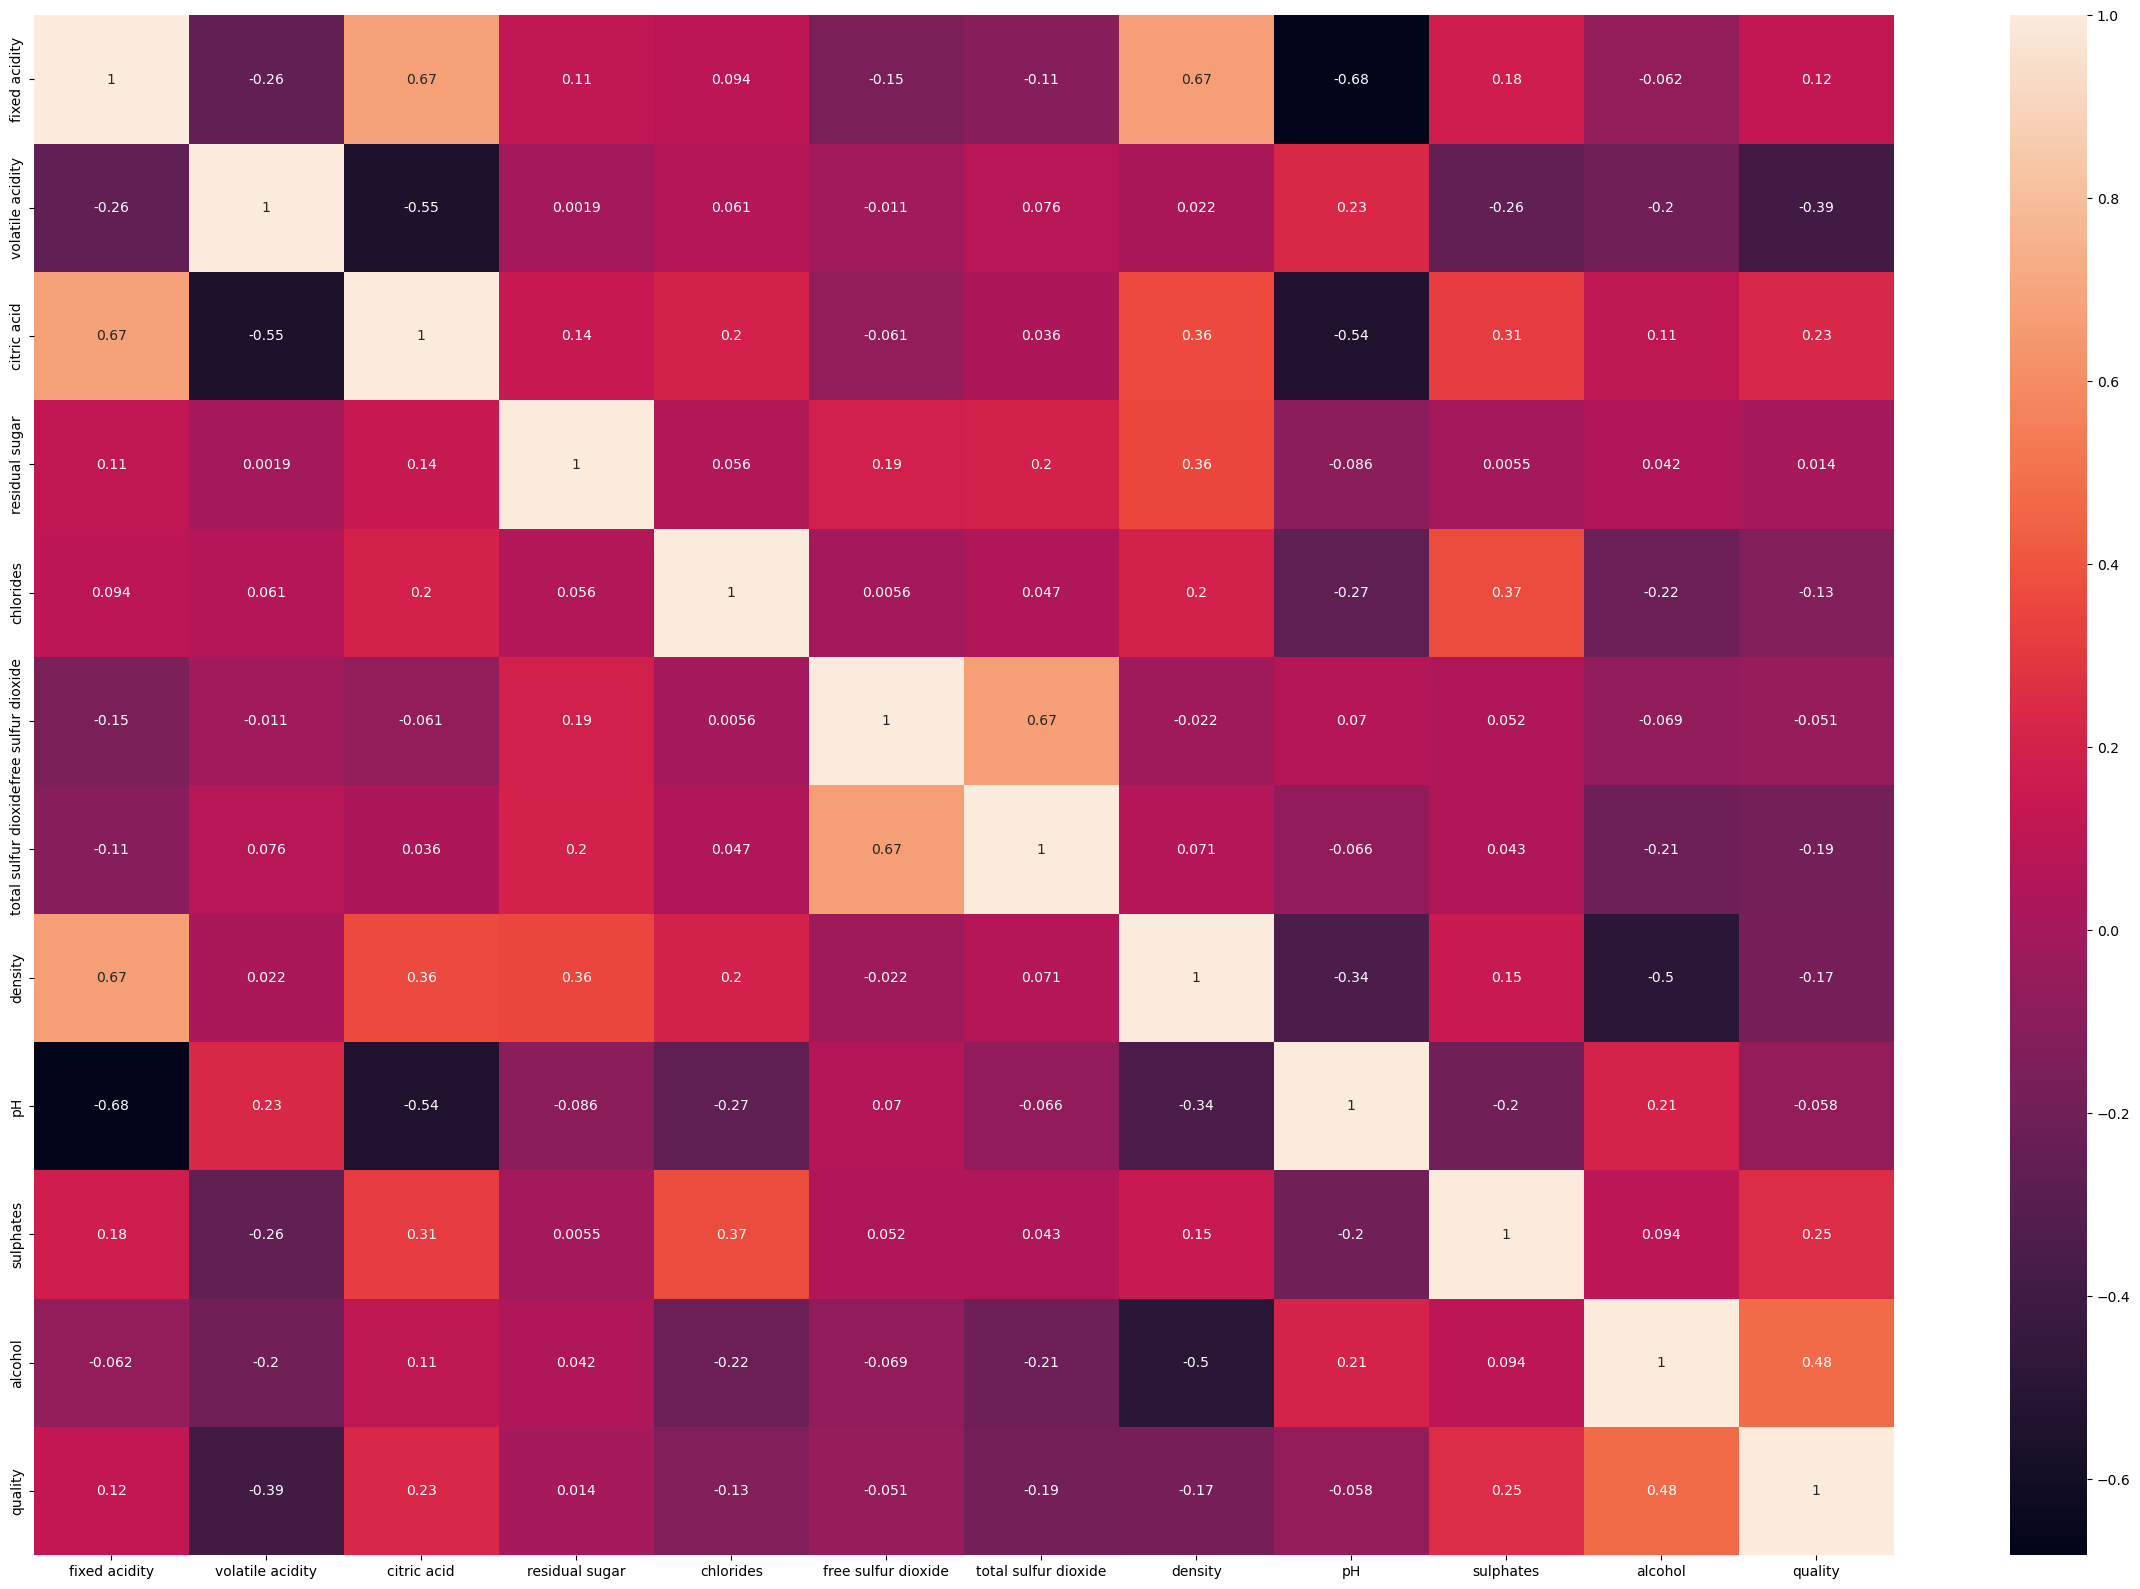

In [10]:
plt.figure(figsize=(30,20))
corr=data.corr()
sns.heatmap(corr, annot= True)
plt.savefig('correlation matrix.png')
plt.show()

#Detection of outliers using z-score

In [11]:
from scipy import stats
z =np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

# z.3(Threshold)-> this is an outlier

In [12]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

# Remove those record whose Z>3(outlier)

In [13]:
new_data=data[(z<3).all(axis=1)]

In [14]:
new_data.shape

(1451, 12)

In [15]:
data.shape

(1599, 12)

# Data splitting into feature (X) and target column(Y)

In [21]:
from sklearn.model_selection import train_test_split
## X- input feature
X= new_data.drop(columns = 'quality')
## y-output feature
y=new_data['quality']

In [22]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [24]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

# Data modeling using RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel=RandomForestClassifier(n_estimators=100)

In [26]:
rf_classificationModel.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred =rf_classificationModel.predict(X_test)

In [28]:
y_pred

array([5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6, 5,
       7, 6, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5,
       4, 6, 6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 7, 7, 5, 5,
       5, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 5, 7, 5, 7, 5, 6, 6, 5, 5, 5,
       7, 5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 7, 7, 7, 5, 6, 5, 7, 6,
       5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 6], dtype=int64)

# Data evaluation in metrics

In [32]:
from sklearn import metrics
print('Accuracy score', metrics.accuracy_score(y_test, y_pred))


Accuracy score 0.7010309278350515


Accuracy score:70.5% 

# Hyperparameter tuning->gridsearchcv

[Text(0.48908943965517243, 0.975, 'x[2] <= 0.295\ngini = 0.644\nsamples = 736\nvalue = [34, 506, 443, 161, 16]'),
 Text(0.20847925646551724, 0.925, 'x[10] <= 10.15\ngini = 0.569\nsamples = 425\nvalue = [29, 362, 239, 34, 0]'),
 Text(0.09873383620689655, 0.875, 'x[1] <= 0.548\ngini = 0.476\nsamples = 257\nvalue = [19, 286, 107, 11, 0]'),
 Text(0.02586206896551724, 0.825, 'x[8] <= 3.215\ngini = 0.574\nsamples = 62\nvalue = [4, 47, 42, 4, 0]'),
 Text(0.021551724137931036, 0.775, 'gini = 0.0\nsamples = 10\nvalue = [0, 17, 0, 0, 0]'),
 Text(0.03017241379310345, 0.775, 'x[0] <= 6.35\ngini = 0.579\nsamples = 52\nvalue = [4, 30, 42, 4, 0]'),
 Text(0.02586206896551724, 0.725, 'gini = 0.0\nsamples = 6\nvalue = [0, 9, 0, 0, 0]'),
 Text(0.034482758620689655, 0.725, 'x[2] <= 0.085\ngini = 0.556\nsamples = 46\nvalue = [4, 21, 42, 4, 0]'),
 Text(0.008620689655172414, 0.675, 'x[7] <= 0.997\ngini = 0.111\nsamples = 10\nvalue = [0, 1, 16, 0, 0]'),
 Text(0.004310344827586207, 0.625, 'gini = 0.0\nsamples 

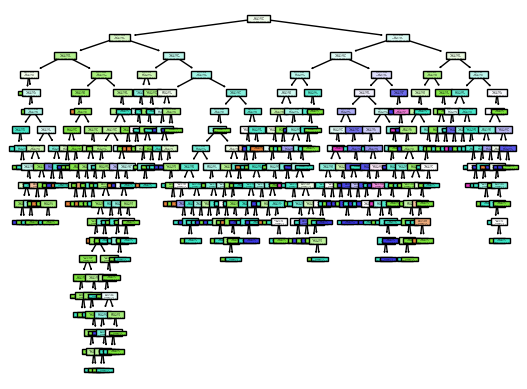

In [33]:
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0],filled=True)

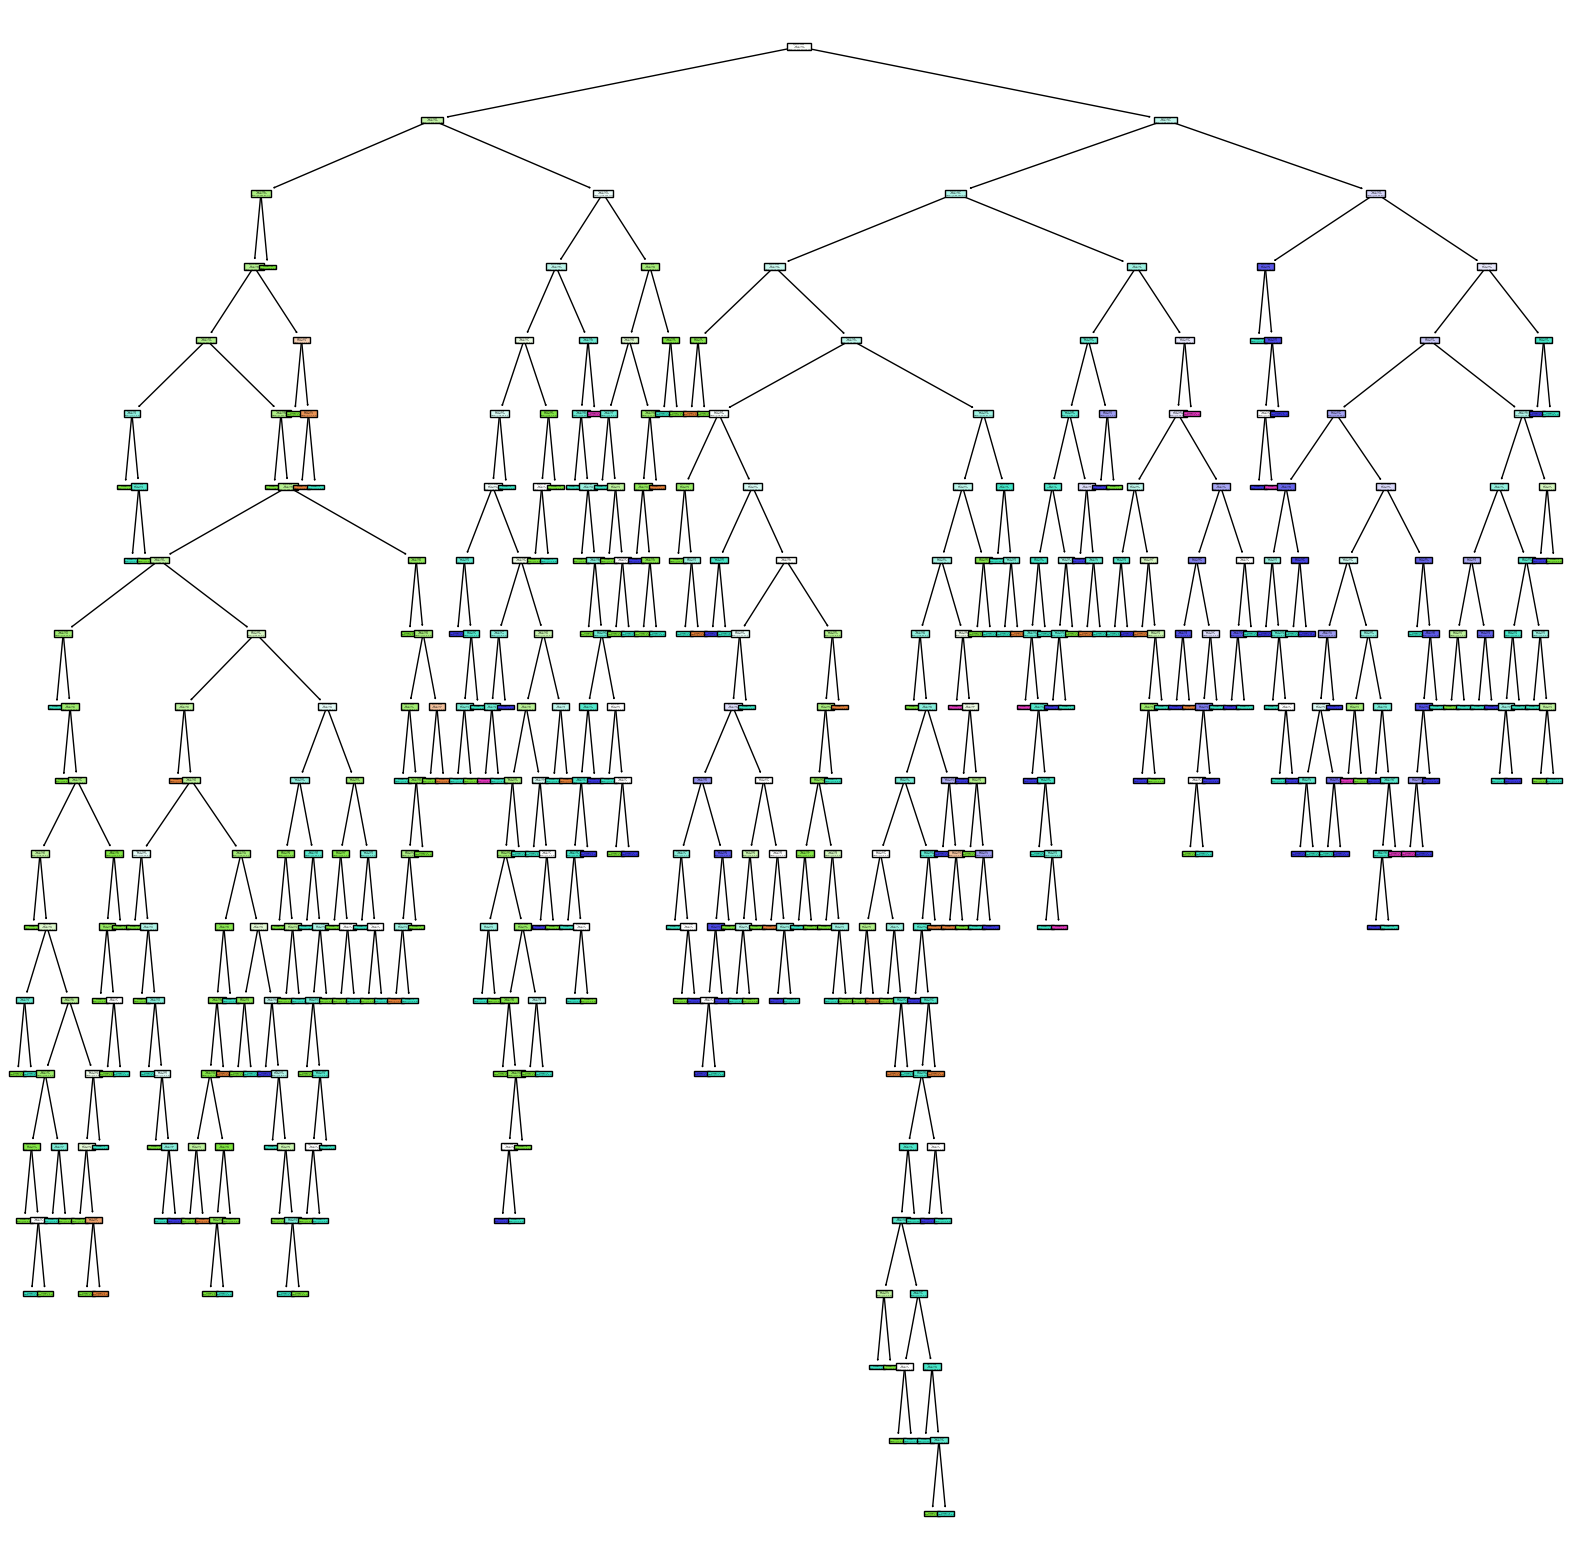

In [38]:
plt.figure(figsize=(20,20))
for i in range(len(rf_classificationModel.estimators_)):
    tree.plot_tree(rf_classificationModel.estimators_[i], filled = True)